In [3]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

import sklearn
import pandas as pd

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics

In [4]:
#reading Building1.csv

electricity_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_3.csv")
print(electricity_data)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      24.431562                              -1.288156e-02   
1                      24.444384                              -6.162604e-05   
2                      24.444445                               9.792859e-07   
3                      

In [5]:
carbon_data = pd.read_csv("citylearn_challenge_2023_phase_1/carbon_intensity.csv")
print(carbon_data)

     carbon_intensity
0            0.402488
1            0.382625
2            0.369458
3            0.367017
4            0.374040
..                ...
715          0.465811
716          0.470324
717          0.462414
718          0.448648
719          0.428057

[720 rows x 1 columns]


In [6]:
pricing_data = pd.read_csv("citylearn_challenge_2023_phase_1/pricing.csv")
print(pricing_data)

     electricity_pricing  electricity_pricing_predicted_6h  \
0                0.02893                           0.02893   
1                0.02893                           0.02915   
2                0.02893                           0.02915   
3                0.02893                           0.02915   
4                0.02893                           0.02915   
..                   ...                               ...   
715              0.02893                           0.02893   
716              0.02893                           0.02893   
717              0.02893                           0.02893   
718              0.02893                           0.02893   
719              0.02893                           0.02893   

     electricity_pricing_predicted_12h  electricity_pricing_predicted_24h  
0                              0.02915                            0.02893  
1                              0.02915                            0.02893  
2                          

In [7]:
weather_data = pd.read_csv("citylearn_challenge_2023_phase_1/weather.csv")
print(weather_data)

     outdoor_dry_bulb_temperature  outdoor_relative_humidity  \
0                           24.66                      77.56   
1                           24.07                      85.12   
2                           23.90                      89.62   
3                           23.87                      91.88   
4                           23.83                      93.06   
..                            ...                        ...   
715                         31.98                      43.75   
716                         29.92                      51.62   
717                         28.48                      59.12   
718                         27.27                      66.56   
719                         26.26                      73.75   

     diffuse_solar_irradiance  direct_solar_irradiance  \
0                        0.00                     0.00   
1                        0.00                     0.00   
2                        0.00                     0.00   

In [8]:
df = pd.concat([electricity_data, carbon_data, pricing_data, weather_data], axis=1)
print(df)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      24.431562                              -1.288156e-02   
1                      24.444384                              -6.162604e-05   
2                      24.444445                               9.792859e-07   
3                      

In [9]:
def create_model_large():
    # create model
    model = Sequential()
    #your code here	
    model.add(Dense(35, input_dim = X_train.shape[1], activation = 'relu'))
    model.add(Dense(70, activation = 'relu'))
    model.add(Dense(35, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = [metrics.mae])
    
    return model

In [10]:
def NRMSE(real, pred):
    return sqrt(mean_squared_error(real, pred)/(real.max() - real.min()))

In [11]:
# Funzione per calcolare NRMSE per una singola variabile con finestra temporale
def NRMSE_window_single_variable(real, pred, w):
    num_timesteps = len(real)  # Numero di osservazioni temporali
    nrmse_windows = []  # Lista per raccogliere gli NRMSE di ciascuna finestra
    
    # Itera su ogni finestra temporale
    for t in range(num_timesteps - w + 1):
        real_window = real[t:t+w]  # Finestra dei dati reali
        pred_window = pred[t:t+w]  # Finestra dei dati predetti
        
        # Calcola l'NRMSE sulla finestra e aggiungilo alla lista
        nrmse_windows.append(NRMSE(real_window, pred_window))
    
    # Restituisce la media degli NRMSE per tutte le finestre temporali
    return np.mean(nrmse_windows)

In [12]:
# Descriptive statistics summary
df.describe()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,...,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h
count,720.0,720.000000,720.000000,720.0,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,6.0,12.500000,4.100000,0.0,24.178425,-0.000124,59.549204,0.877447,0.152430,2.105905,...,29.620327,63.424809,62.786474,61.793372,90.000166,92.607278,91.938938,269.654399,270.472846,272.939691
std,0.0,6.926999,1.973679,0.0,0.352739,0.014624,2.889132,0.850508,0.418799,1.394574,...,4.958327,23.154273,23.444021,24.038353,107.451266,113.491246,115.477304,308.867793,313.529048,320.500605
min,6.0,1.000000,1.000000,0.0,22.777895,-0.261994,53.479610,0.397155,0.000000,0.000000,...,20.947014,19.430300,18.265532,16.665543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.0,6.750000,2.000000,0.0,23.888916,-0.000006,57.699385,0.452230,0.000000,0.867439,...,25.301469,41.746715,42.122503,41.263382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.0,12.500000,4.000000,0.0,24.444246,0.000005,59.312935,0.779240,0.000000,1.860189,...,28.401583,63.427841,63.155060,59.349503,59.419070,62.671502,53.935234,113.453980,100.850993,104.554913
75%,6.0,18.250000,6.000000,0.0,24.444448,0.000009,61.301242,0.993199,0.058597,3.192224,...,33.839770,82.917892,81.912389,81.111492,147.018658,154.836665,149.505160,542.437350,547.864400,519.350328
max,6.0,24.000000,7.000000,0.0,24.444475,0.092478,68.515810,8.399374,5.684579,6.168690,...,40.484505,100.000000,100.000000,100.000000,461.251400,554.828740,551.798160,1056.334800,1129.740700,1237.587500


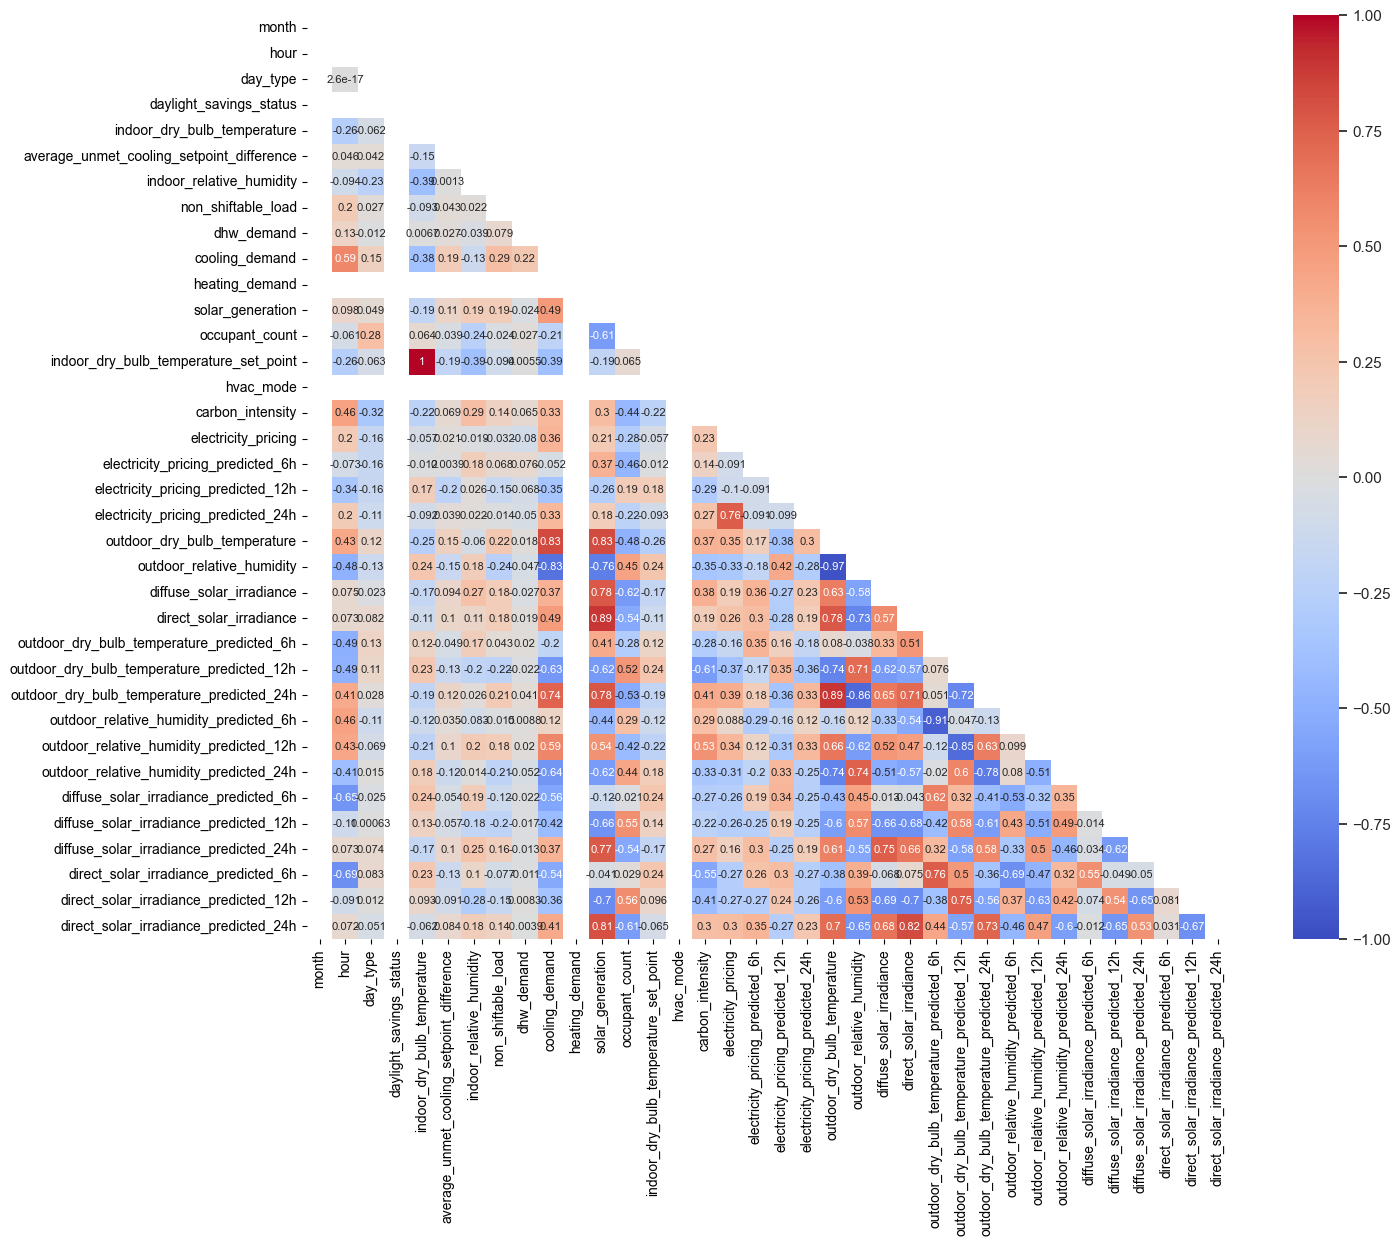

In [13]:
# Correlation matrix
corrmat = df.corr()

# Generate a mask for the upper triangle
matrix = np.triu(corrmat)
f, ax = plt.subplots(figsize=(16, 12))
sns.set(font_scale=1)
sns.heatmap(corrmat, vmin=-1, vmax=1, center= 0, square=True, annot=True, annot_kws={'size': 8}, mask=matrix, fmt='.2g', cmap= 'coolwarm')

plt.show()

Ora seguiranno in ordine le predizioni relative a:

    1. cooling load
    2. dhw load
    3. non shiftable load

In [14]:
dataframe = df
# Standardizing data
sc= MinMaxScaler(feature_range=(-1,1))

target = 'cooling_demand'

features = ['month', 'hour', 'day_type', 'daylight_savings_status',
       'indoor_dry_bulb_temperature',
       'average_unmet_cooling_setpoint_difference', 'indoor_relative_humidity',
       'non_shiftable_load', 'dhw_demand', 'heating_demand',
       'solar_generation', 'occupant_count',
       'indoor_dry_bulb_temperature_set_point', 'hvac_mode',
       'carbon_intensity', 'electricity_pricing',
       'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h',
       'electricity_pricing_predicted_24h', 'outdoor_dry_bulb_temperature',
       'outdoor_relative_humidity', 'diffuse_solar_irradiance',
       'direct_solar_irradiance', 'outdoor_dry_bulb_temperature_predicted_6h',
       'outdoor_dry_bulb_temperature_predicted_12h',
       'outdoor_dry_bulb_temperature_predicted_24h',
       'outdoor_relative_humidity_predicted_6h',
       'outdoor_relative_humidity_predicted_12h',
       'outdoor_relative_humidity_predicted_24h',
       'diffuse_solar_irradiance_predicted_6h',
       'diffuse_solar_irradiance_predicted_12h',
       'diffuse_solar_irradiance_predicted_24h',
       'direct_solar_irradiance_predicted_6h',
       'direct_solar_irradiance_predicted_12h',
       'direct_solar_irradiance_predicted_24h']

for var in features:
    if(var != 'cooling_demand'):
        dataframe[var] = sc.fit_transform(dataframe[var].values.reshape(-1, 1))

In [15]:
#NumPy representation of the data frame (removing labels)
dataframe = pd.DataFrame(data=dataframe)

X = dataframe.drop(columns='cooling_demand')
X = X.to_numpy()

Y = dataframe['cooling_demand']
Y = Y.to_numpy()


seed = 7
np.random.seed(seed)

# split dataset in 70% for traininig and 30% for testing (500 -> 375,125)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

# split training in 80% for traininig and 20% for validating (375 -> 300,75)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=seed)#insert your code here

# Model creation (choose between tiny, small, medium and large by using the appropriate function)
model = create_model_large()
model.summary()


c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 35)             │         1,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 35)             │         2,485 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,301 (24.61 KB)

 Trainable params: 6,301 (24.61 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=32)

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.2765 - mean_absolute_error: 1.3529 - val_loss: 1.6086 - val_mean_absolute_error: 1.0564
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3294 - mean_absolute_error: 0.9548 - val_loss: 0.8139 - val_mean_absolute_error: 0.6615
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6391 - mean_absolute_error: 0.5600 - val_loss: 0.7381 - val_mean_absolute_error: 0.6444
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5073 - mean_absolute_error: 0.5163 - val_loss: 0.5498 - val_mean_absolute_error: 0.5246
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3454 - mean_absolute_error: 0.4337 - val_loss: 0.4749 - val_mean_absolute_error: 0.4826
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3190 - mean_absolute_error: 0.4074 - val_loss: 0.4389 - val_mean_absolute_error: 0.4636
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3585 - mean_absolute_error: 0.4376 - val_los

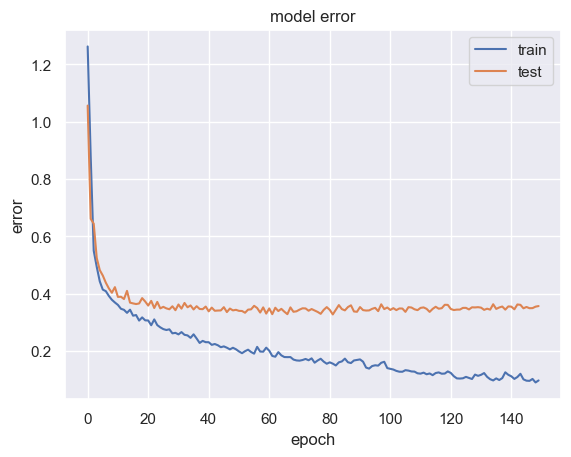

In [17]:
# Summarize history for error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

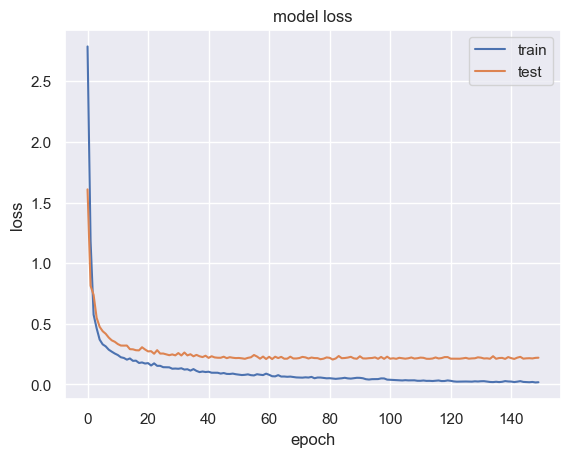

In [18]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [19]:
# Prediction
pred = model.predict(X_test).reshape(1,-1)[0]

nrmse_cooling = NRMSE(y_test, pred)


print("nrmse : ",nrmse_cooling)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
nrmse :  0.19807579481363957


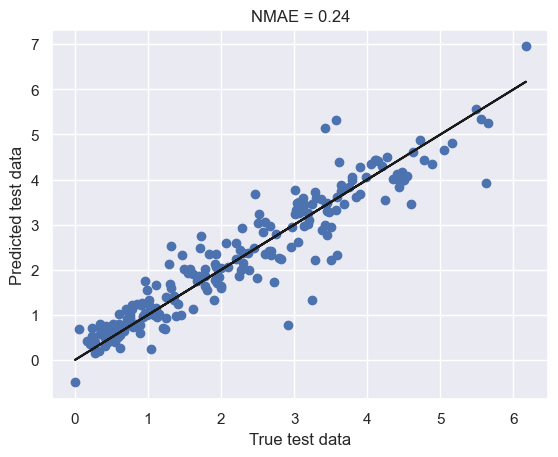

In [20]:
plt.scatter(y_test, pred)
plt.title(r"NMAE = %.2f" % (np.abs(y_test - pred).mean()/y_test.std()))
plt.plot(y_test, y_test, 'k-')
plt.xlabel('True test data')
plt.ylabel('Predicted test data')
plt.show()

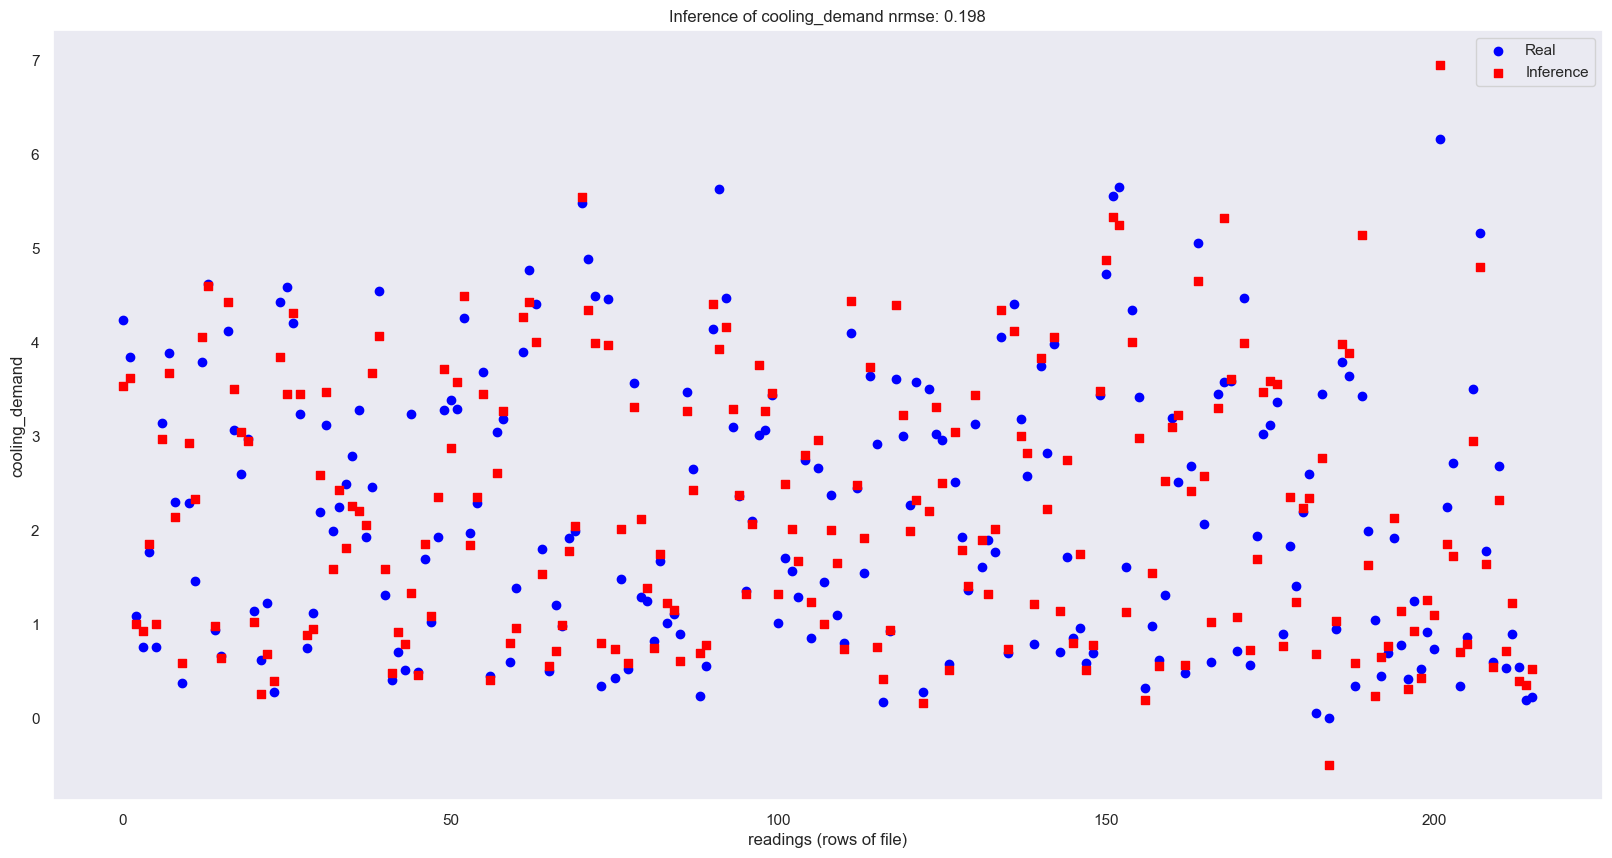

In [21]:
my_x=np.arange(0,len(X_test[:, 0]),1)

fig = plt.figure(figsize=(20,10))
plt.scatter(my_x, y_test, label='Real', color='blue', marker='o')
plt.scatter(my_x, pred, label='Inference', color='red', marker='s')
plt.title(f'Inference of cooling_demand nrmse: {nrmse_cooling:.3f}')
plt.ylabel('cooling_demand')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.legend()
plt.show()

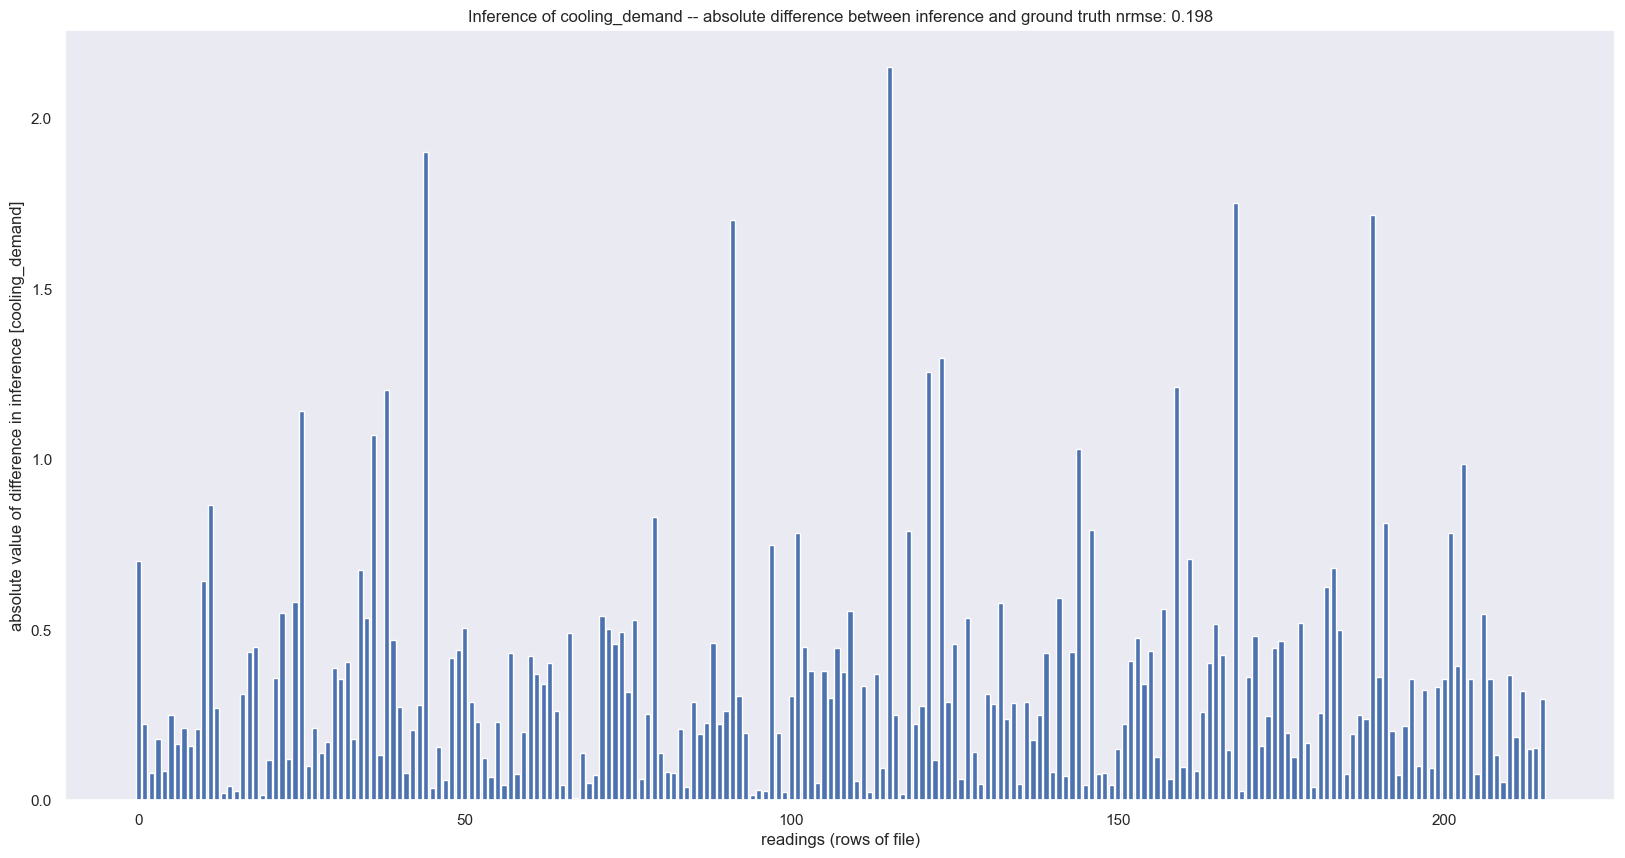

In [22]:
fig = plt.figure(figsize=(20,10))
my_d = abs(y_test-pred)

plt.bar(my_x,my_d)
plt.title(f'Inference of cooling_demand -- absolute difference between inference and ground truth nrmse: {nrmse_cooling:.3f}')
plt.ylabel('absolute value of difference in inference [cooling_demand]')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.show()

In [23]:
w = 48

nrmse_single_cooling = NRMSE_window_single_variable(y_test, pred, w)
print("NRMSE per singola variabile con finestra temporale:", nrmse_single_cooling)

NRMSE per singola variabile con finestra temporale: 0.22094543645021655


Predizione del dhw load

In [24]:
# Standardizing data
sc= MinMaxScaler(feature_range=(-1,1))

dataframe = df

target = 'dhw_demand'

features = ['month', 'hour', 'day_type', 'daylight_savings_status',
       'indoor_dry_bulb_temperature',
       'average_unmet_cooling_setpoint_difference', 'indoor_relative_humidity',
       'non_shiftable_load', 'cooling_demand', 'heating_demand',
       'solar_generation', 'occupant_count',
       'indoor_dry_bulb_temperature_set_point', 'hvac_mode',
       'carbon_intensity', 'electricity_pricing',
       'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h',
       'electricity_pricing_predicted_24h', 'outdoor_dry_bulb_temperature',
       'outdoor_relative_humidity', 'diffuse_solar_irradiance',
       'direct_solar_irradiance', 'outdoor_dry_bulb_temperature_predicted_6h',
       'outdoor_dry_bulb_temperature_predicted_12h',
       'outdoor_dry_bulb_temperature_predicted_24h',
       'outdoor_relative_humidity_predicted_6h',
       'outdoor_relative_humidity_predicted_12h',
       'outdoor_relative_humidity_predicted_24h',
       'diffuse_solar_irradiance_predicted_6h',
       'diffuse_solar_irradiance_predicted_12h',
       'diffuse_solar_irradiance_predicted_24h',
       'direct_solar_irradiance_predicted_6h',
       'direct_solar_irradiance_predicted_12h',
       'direct_solar_irradiance_predicted_24h']

for var in features:
    if(var != 'dhw_demand'):
        dataframe[var] = sc.fit_transform(dataframe[var].values.reshape(-1, 1))

In [25]:
#NumPy representation of the data frame (removing labels)
dataframe = pd.DataFrame(data=dataframe)

X = dataframe.drop(columns='dhw_demand')
X = X.to_numpy()

Y = dataframe['dhw_demand']
Y = Y.to_numpy()


seed = 7
np.random.seed(seed)

# split dataset in 70% for traininig and 30% for testing (500 -> 375,125)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

# split training in 80% for traininig and 20% for validating (375 -> 300,75)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=seed)#insert your code here

# Model creation (choose between tiny, small, medium and large by using the appropriate function)
model = create_model_large()
model.summary()

c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 35)             │         1,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 35)             │         2,485 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,301 (24.61 KB)

 Trainable params: 6,301 (24.61 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=32)

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3126 - mean_absolute_error: 0.4706 - val_loss: 0.0961 - val_mean_absolute_error: 0.2074
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0485 - mean_absolute_error: 0.1749 - val_loss: 0.0760 - val_mean_absolute_error: 0.1917
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0308 - mean_absolute_error: 0.1357 - val_loss: 0.0629 - val_mean_absolute_error: 0.1280
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0229 - mean_absolute_error: 0.0943 - val_loss: 0.0615 - val_mean_absolute_error: 0.1327
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.1055 - val_loss: 0.0611 - val_mean_absolute_error: 0.1096
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0208 - mean_absolute_error: 0.0935 - val_loss: 0.0603 - val_mean_absolute_error: 0.1145
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0163 - mean_absolute_error: 0.0856 - val_los

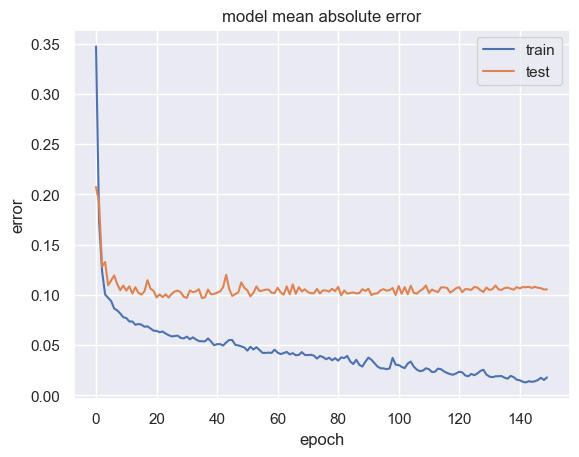

In [27]:
# Summarize history for error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean absolute error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

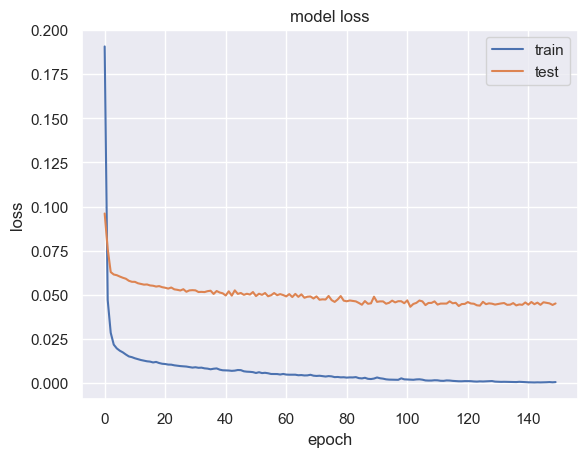

In [28]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [29]:
# Prediction
pred = model.predict(X_test).reshape(1,-1)[0]

nrmse_dhw = NRMSE(y_test, pred)


print("nrmse : ",nrmse_dhw)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
nrmse :  0.18205305745753925


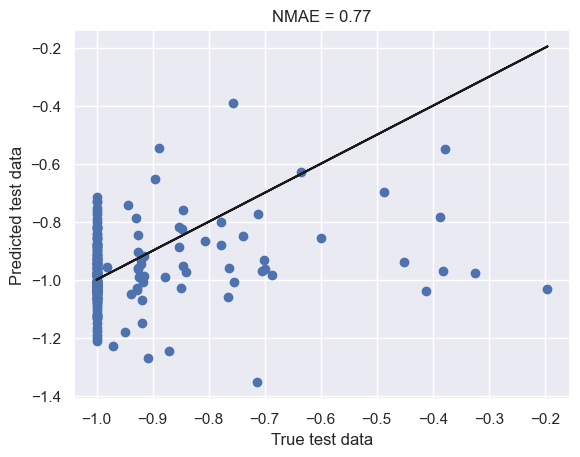

In [30]:
plt.scatter(y_test, pred)
plt.title(r"NMAE = %.2f" % (np.abs(y_test - pred).mean()/y_test.std()))
plt.plot(y_test, y_test, 'k-')
plt.xlabel('True test data')
plt.ylabel('Predicted test data')
plt.show()

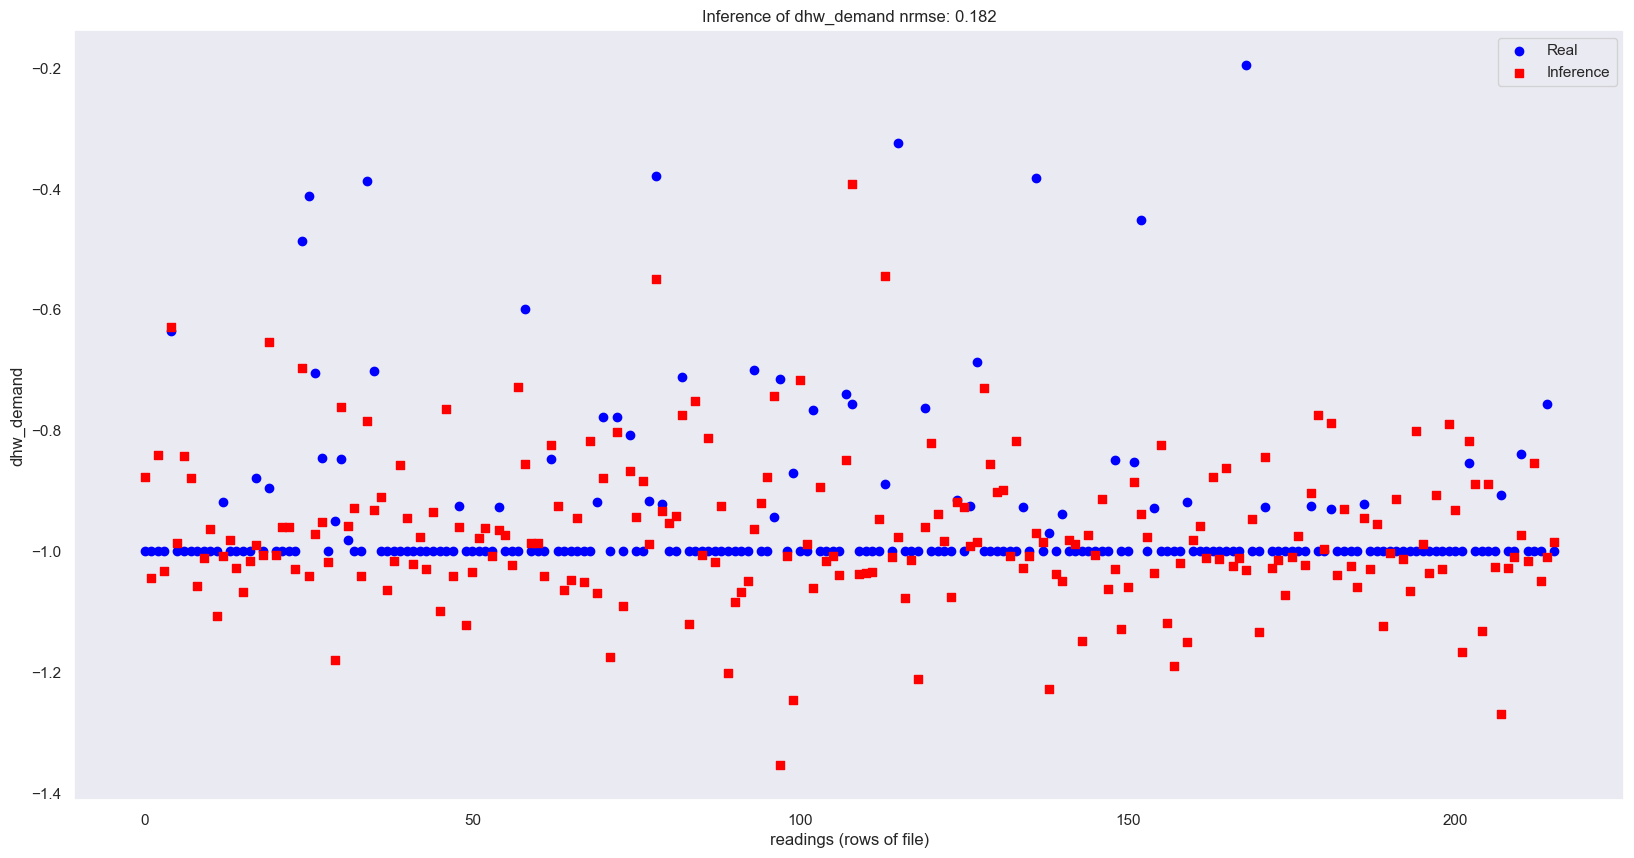

In [31]:
my_x=np.arange(0,len(X_test[:, 0]),1)

fig = plt.figure(figsize=(20,10))
plt.scatter(my_x, y_test, label='Real', color='blue', marker='o')
plt.scatter(my_x, pred, label='Inference', color='red', marker='s')
plt.title(f'Inference of dhw_demand nrmse: {nrmse_dhw:.3f}')
plt.ylabel('dhw_demand')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.legend()
plt.show()

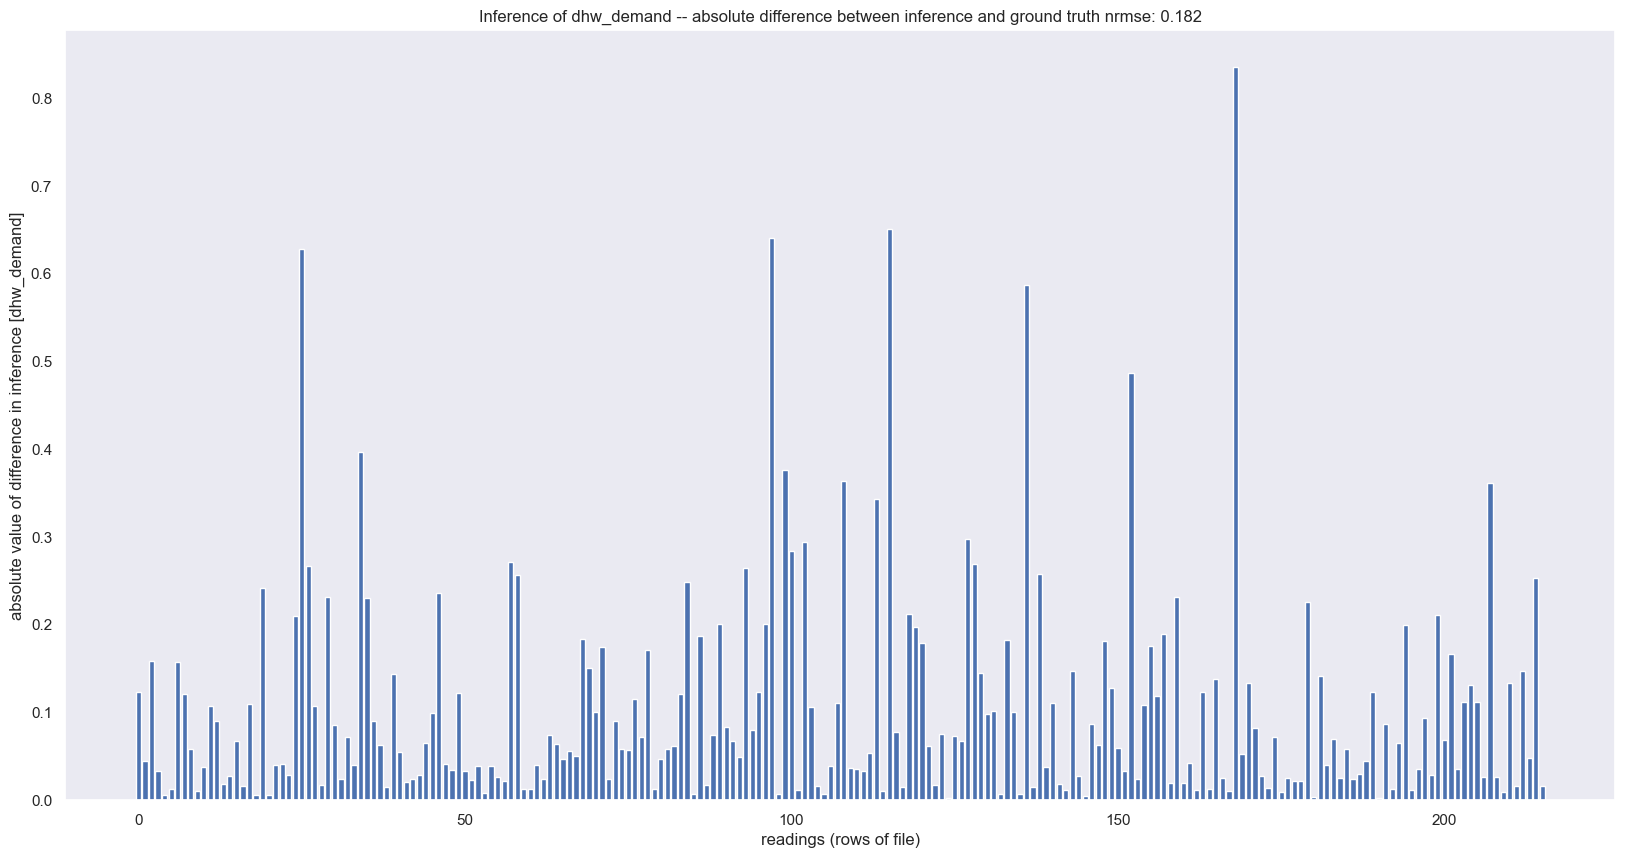

In [32]:
fig = plt.figure(figsize=(20,10))
my_d = abs(y_test-pred)

plt.bar(my_x,my_d)
plt.title(f'Inference of dhw_demand -- absolute difference between inference and ground truth nrmse: {nrmse_dhw:.3f}')
plt.ylabel('absolute value of difference in inference [dhw_demand]')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.show()

In [33]:
w = 48

nrmse_single_dhw = NRMSE_window_single_variable(y_test, pred, w)
print("NRMSE per singola variabile con finestra temporale:", nrmse_single_dhw)

NRMSE per singola variabile con finestra temporale: 0.2030780852654259


Predizione del non shiftable load

In [34]:
# Standardizing data
sc= MinMaxScaler(feature_range=(-1,1))

dataframe = df

target = 'non_shiftable_load'

features = ['month', 'hour', 'day_type', 'daylight_savings_status',
       'indoor_dry_bulb_temperature',
       'average_unmet_cooling_setpoint_difference', 'indoor_relative_humidity',
       'dhw_demand', 'cooling_demand', 'heating_demand',
       'solar_generation', 'occupant_count',
       'indoor_dry_bulb_temperature_set_point', 'hvac_mode',
       'carbon_intensity', 'electricity_pricing',
       'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h',
       'electricity_pricing_predicted_24h', 'outdoor_dry_bulb_temperature',
       'outdoor_relative_humidity', 'diffuse_solar_irradiance',
       'direct_solar_irradiance', 'outdoor_dry_bulb_temperature_predicted_6h',
       'outdoor_dry_bulb_temperature_predicted_12h',
       'outdoor_dry_bulb_temperature_predicted_24h',
       'outdoor_relative_humidity_predicted_6h',
       'outdoor_relative_humidity_predicted_12h',
       'outdoor_relative_humidity_predicted_24h',
       'diffuse_solar_irradiance_predicted_6h',
       'diffuse_solar_irradiance_predicted_12h',
       'diffuse_solar_irradiance_predicted_24h',
       'direct_solar_irradiance_predicted_6h',
       'direct_solar_irradiance_predicted_12h',
       'direct_solar_irradiance_predicted_24h']

for var in features:
    if(var != 'non_shiftable_load'):
        dataframe[var] = sc.fit_transform(dataframe[var].values.reshape(-1, 1))

In [35]:
#NumPy representation of the data frame (removing labels)
dataframe = pd.DataFrame(data=dataframe)

X = dataframe.drop(columns='non_shiftable_load')
X = X.to_numpy()

Y = dataframe['non_shiftable_load']
Y = Y.to_numpy()


seed = 7
np.random.seed(seed)

# split dataset in 70% for traininig and 30% for testing (500 -> 375,125)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

# split training in 80% for traininig and 20% for validating (375 -> 300,75)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=seed)#insert your code here

# Model creation (choose between tiny, small, medium and large by using the appropriate function)
model = create_model_large()
model.summary()

c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 35)             │         1,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 70)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 35)             │         2,485 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,301 (24.61 KB)

 Trainable params: 6,301 (24.61 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=32)

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.4116 - mean_absolute_error: 0.5796 - val_loss: 0.1327 - val_mean_absolute_error: 0.2207
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0785 - mean_absolute_error: 0.1987 - val_loss: 0.0843 - val_mean_absolute_error: 0.1517
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.1163 - val_loss: 0.0798 - val_mean_absolute_error: 0.1376
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0336 - mean_absolute_error: 0.1015 - val_loss: 0.0788 - val_mean_absolute_error: 0.1241
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0291 - mean_absolute_error: 0.0858 - val_loss: 0.0747 - val_mean_absolute_error: 0.1170
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0161 - mean_absolute_error: 0.0727 - val_loss: 0.0741 - val_mean_absolute_error: 0.1122
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0368 - mean_absolute_error: 0.0804 - val_los

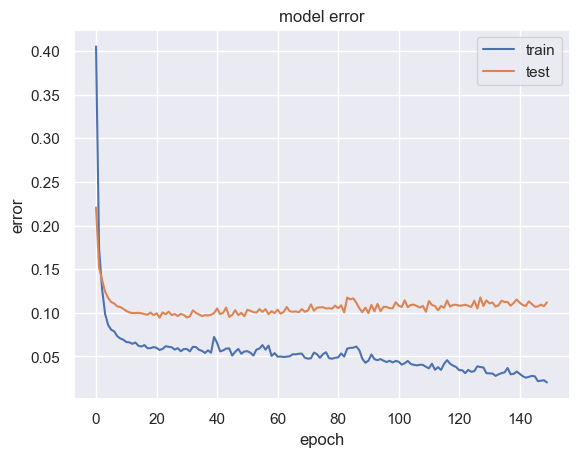

In [37]:
# Summarize history for error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

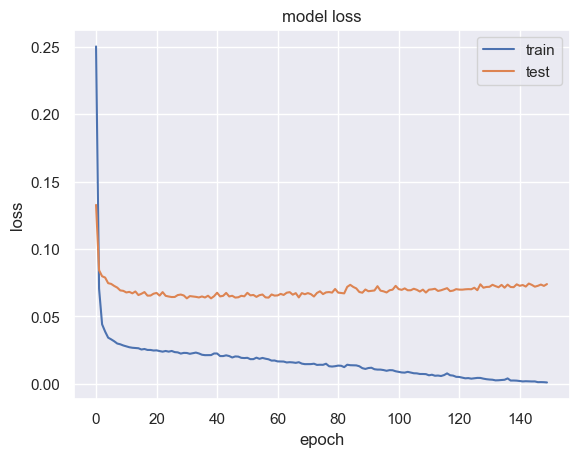

In [38]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [39]:
# Prediction
pred = model.predict(X_test).reshape(1,-1)[0]

nrmse_nonshiftable = NRMSE(y_test, pred)


print("nrmse : ",nrmse_nonshiftable)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
nrmse :  0.16525777678249817


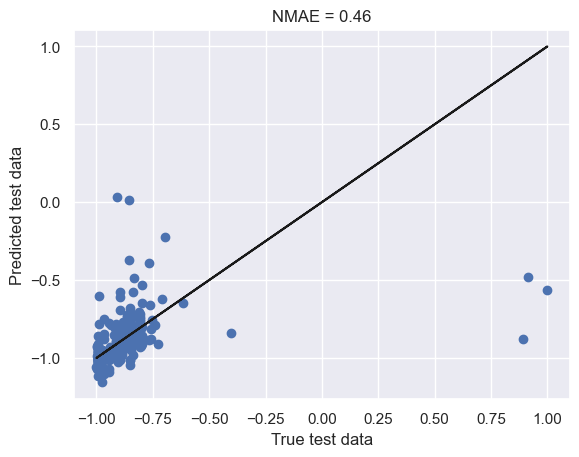

In [40]:
plt.scatter(y_test, pred)
plt.title(r"NMAE = %.2f" % (np.abs(y_test - pred).mean()/y_test.std()))
plt.plot(y_test, y_test, 'k-')
plt.xlabel('True test data')
plt.ylabel('Predicted test data')
plt.show()

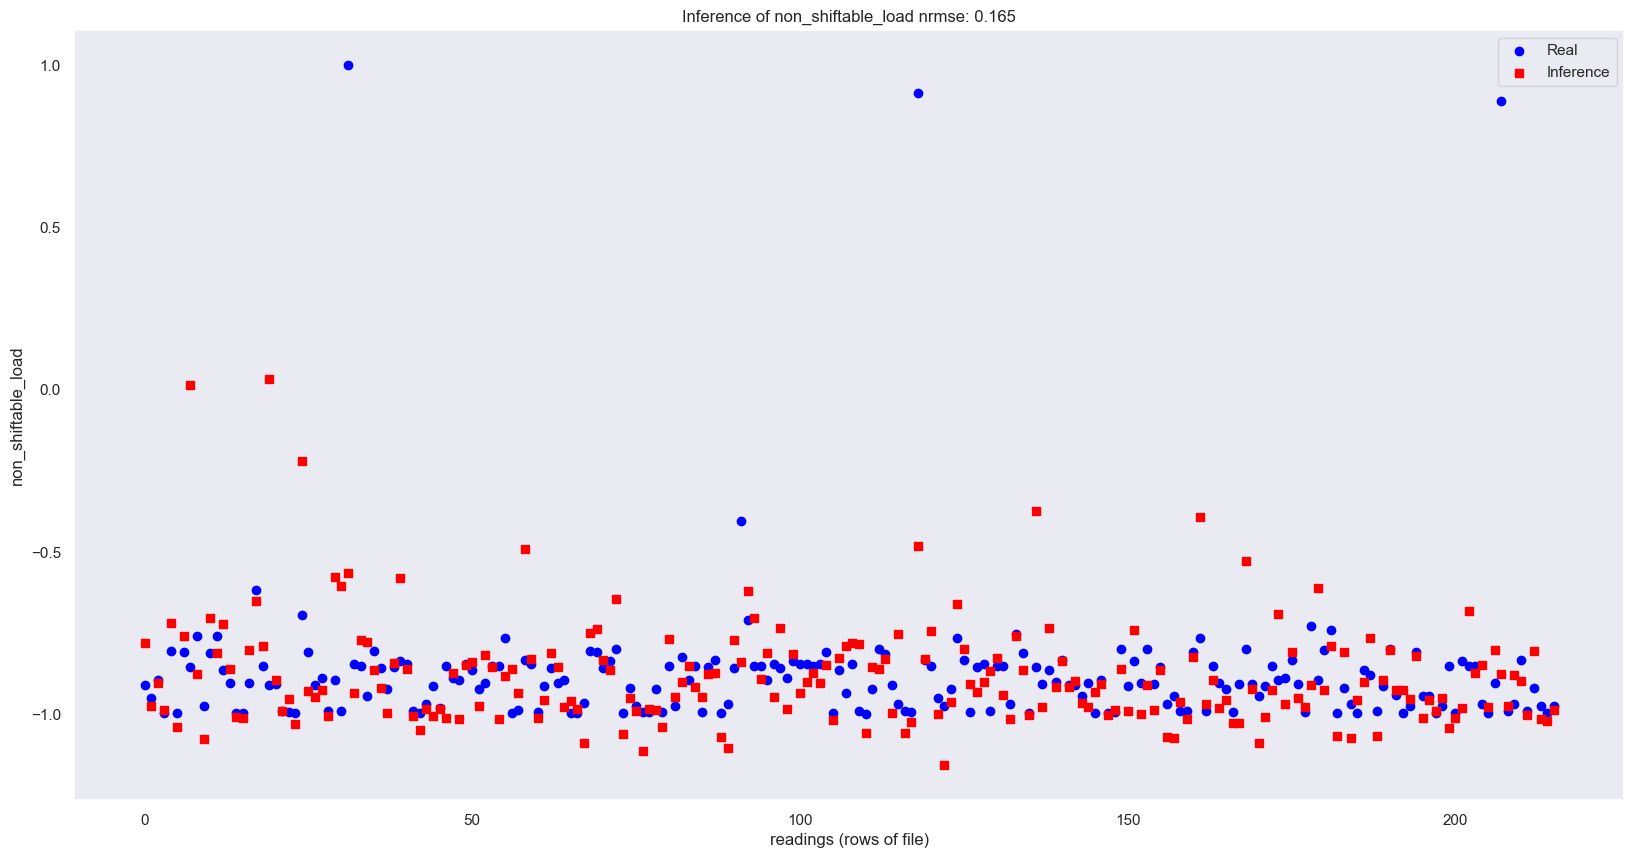

In [41]:
my_x=np.arange(0,len(X_test[:, 0]),1)

fig = plt.figure(figsize=(20,10))
plt.scatter(my_x, y_test, label='Real', color='blue', marker='o')
plt.scatter(my_x, pred, label='Inference', color='red', marker='s')
plt.title(f'Inference of non_shiftable_load nrmse: {nrmse_nonshiftable:.3f}')
plt.ylabel('non_shiftable_load')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.legend()
plt.show()

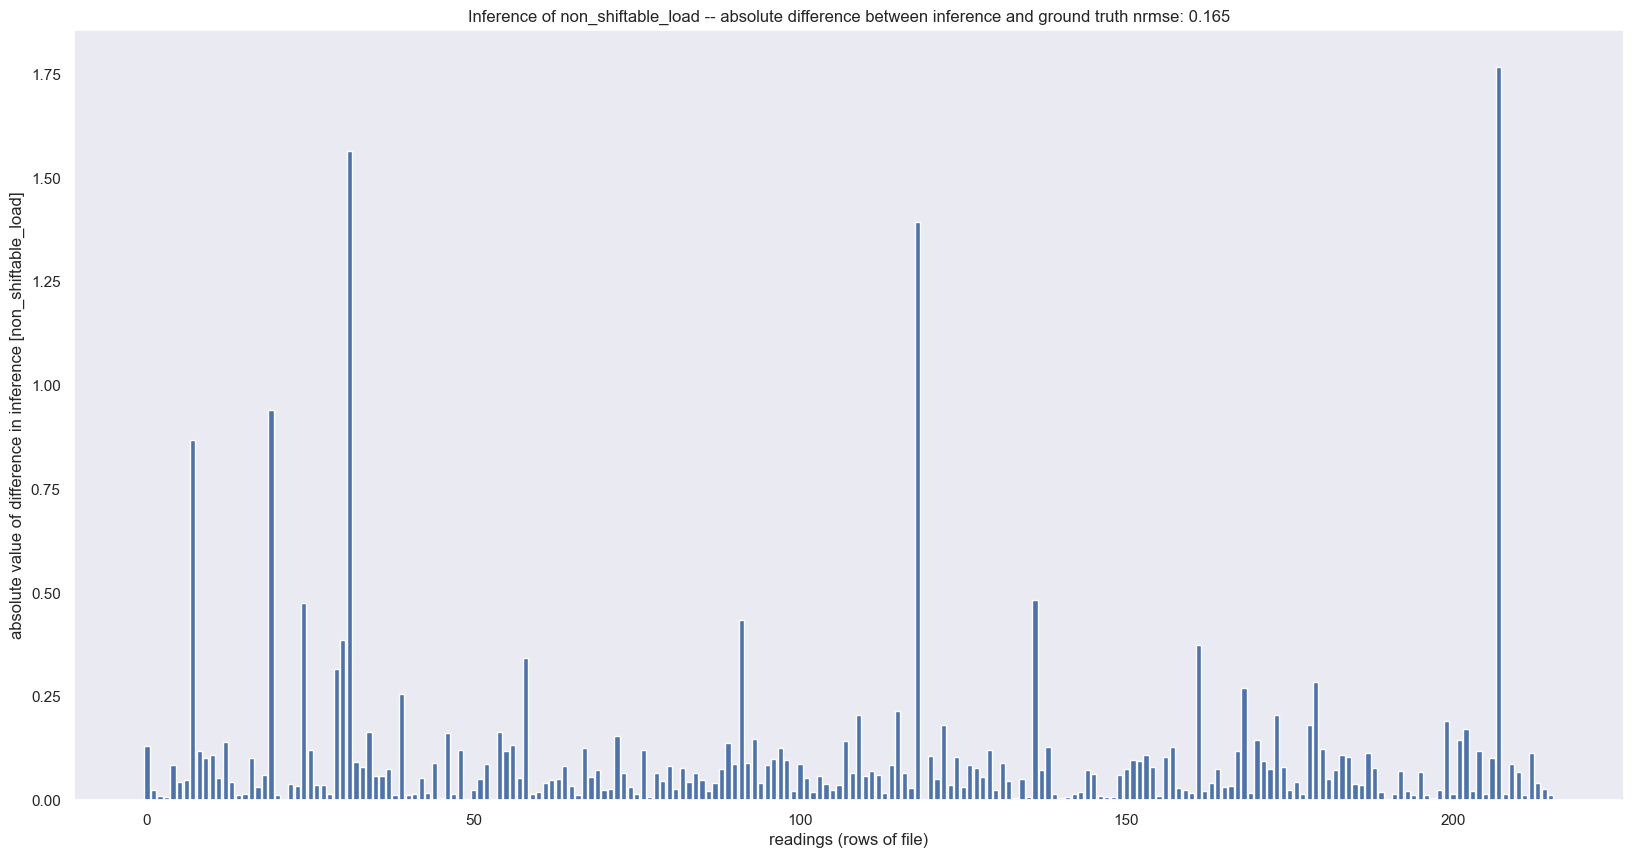

In [42]:
fig = plt.figure(figsize=(20,10))
my_d = abs(y_test-pred)

plt.bar(my_x,my_d)
plt.title(f'Inference of non_shiftable_load -- absolute difference between inference and ground truth nrmse: {nrmse_nonshiftable:.3f}')
plt.ylabel('absolute value of difference in inference [non_shiftable_load]')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.show()

In [43]:
w = 48

nrmse_single_non_shiftable = NRMSE_window_single_variable(y_test, pred, w)
print("NRMSE per singola variabile con finestra temporale:", nrmse_single_non_shiftable)

NRMSE per singola variabile con finestra temporale: 0.18700773620515015


In [44]:
#non riuscendo a capire molto dalla sola formula ho provato a "tradurre" la definizione e ho dato due soluzioni

#questo ScoreForecast è dato dalla somma di tutte le NRMSE calcolate precedentemente e divise per il numero totale di variabili
ScoreForecast = (nrmse_nonshiftable + nrmse_cooling + nrmse_dhw) / 3
print(f"La media, su tutte le variabili previste, dell'errore quadratico medio normalizzato (NRMSE) delle previsioni effettuate: {ScoreForecast:.3f}.")

La media, su tutte le variabili previste, dell'errore quadratico medio normalizzato (NRMSE) delle previsioni effettuate: 0.182.


In [45]:
#questo invece è dato dalla somma di tutte le NRMSE tenendo conto di una finestra temporale (48h), e si dovrebbe avvicinare alla formula
ScoreForecast = (nrmse_single_non_shiftable + nrmse_single_cooling + nrmse_single_dhw) / 3
print(f"La media, su tutte le variabili previste, dell'errore quadratico medio normalizzato (NRMSE) delle previsioni effettuate: {ScoreForecast:.3f}.")

La media, su tutte le variabili previste, dell'errore quadratico medio normalizzato (NRMSE) delle previsioni effettuate: 0.204.
